**1. KHAI BÁO THƯ VIỆN**

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.utils import np_utils, to_categorical, load_img, img_to_array

**2. ĐƯỜNG DẪN THƯ MỤC CHỨA DỮ LIỆU ẢNH**

In [2]:
# Đường dẫn tới thư mục chứa dữ liệu khuôn mặt
data_dir = '/content/drive/MyDrive/Data'

**3. ĐẾM SỐ THƯ MỤC CHỨA MỖI DỮ LIỆU ẢNH**

In [3]:
# Tạo danh sách các thư mục con
subdirs = [os.path.join(data_dir, subdir) for subdir in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, subdir))]
# In ra số thư mục con
print("Số thư mục con :", len(subdirs))

Số thư mục con : 5


**4. ĐẾM SỐ LƯỢNG ẢNH CÓ TRONG MỖI THƯ MỤC VÀ TỔNG CÁC ẢNH TRONG CÁC THƯ MỤC**

In [4]:
# In ra tên của từng thư mục con và số lượng ảnh trong mỗi thư mục
total_images = 0
for subdir in subdirs:
    images = [file for file in os.listdir(subdir) if file.endswith('.jpg')]
    num_images = len(images)
    total_images += num_images
    print("Thư mục:", subdir)
    print("Số lượng ảnh:", num_images)

print(80*'-')

# In ra tổng số lượng ảnh của tất cả thư mục
print("Tổng số lượng ảnh:", total_images)

Thư mục: /content/drive/MyDrive/Data/AnhKiet_20146499
Số lượng ảnh: 496
Thư mục: /content/drive/MyDrive/Data/Dat_20146488
Số lượng ảnh: 762
Thư mục: /content/drive/MyDrive/Data/Phong_20146132
Số lượng ảnh: 488
Thư mục: /content/drive/MyDrive/Data/Thach_20146530
Số lượng ảnh: 432
Thư mục: /content/drive/MyDrive/Data/Thai_20146117
Số lượng ảnh: 470
--------------------------------------------------------------------------------
Tổng số lượng ảnh: 2648


**5. DỮ LIỆU, NHÃN - PHÂN CHIA VÀ CHUẨN HÓA DỮ LIỆU**

In [5]:
# Khởi tạo danh sách dữ liệu và nhãn
data = []
labels = []

# Đọc dữ liệu từ các thư mục con
for i, subdir in enumerate(subdirs):
    images = [file for file in os.listdir(subdir) if file.endswith('.jpg')]
    for image in images:
        img_path = os.path.join(subdir, image)
        img = plt.imread(img_path)
        data.append(img)
        labels.append(i)

In [6]:
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
if len(data) <= 0:
    print("Không đủ dữ liệu để phân chia thành tập huấn luyện và tập kiểm tra.")
else:
    train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

In [7]:
train_data = np.array(train_data)
test_data = np.array(test_data)

In [8]:
# Chuẩn hóa dữ liệu
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

In [9]:
# Chuyển đổi nhãn thành one-hot encoding
num_classes = len(subdirs)
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

**6. KIỂM TRA SỐ LƯỢNG ẢNH HUẤN LUYỆN VÀ KIỂM TRA SAU QUÁ TRÌNH PHÂN CHIA**

In [10]:
print("Số lượng ảnh huấn luyện:", len(train_data))
print("Số lượng nhãn huấn luyện:", len(train_labels))
print("Số lượng ảnh kiểm tra:", len(test_data))
print("Số lượng nhãn kiểm tra:", len(test_labels))

Số lượng ảnh huấn luyện: 2118
Số lượng nhãn huấn luyện: 2118
Số lượng ảnh kiểm tra: 530
Số lượng nhãn kiểm tra: 530


**7. XÂY DỰNG MÔ HÌNH HỌC DỮ LIỆU THEO THUẬT TOÁN CNN (Convolutional Neural Network)**

In [11]:
# Xây dựng mô hình CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(231, 231, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

In [12]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 231, 231, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 115, 115, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 115, 115, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 57, 57, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [14]:
# Định nghĩa callback để lưu model có độ chính xác cao nhất
checkpoint = ModelCheckpoint('model_1_face_detection_20146132.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [15]:
# Huấn luyện mô hình
epochs = 20
batch_size = 32
history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_data, test_labels), callbacks=[checkpoint])

Epoch 1/20
67/67 [==============================] - ETA: 0s - loss: 1.5486 - accuracy: 0.8692
Epoch 1: val_accuracy improved from -inf to 0.99811, saving model to model_1_face_detection_20146132.h5
67/67 [==============================] - 25s 159ms/step - loss: 1.5486 - accuracy: 0.8692 - val_loss: 0.0060 - val_accuracy: 0.9981
Epoch 2/20
66/67 [============================>.] - ETA: 0s - loss: 0.0137 - accuracy: 0.9953
Epoch 2: val_accuracy improved from 0.99811 to 1.00000, saving model to model_1_face_detection_20146132.h5
67/67 [==============================] - 10s 153ms/step - loss: 0.0136 - accuracy: 0.9953 - val_loss: 8.7733e-04 - val_accuracy: 1.0000
Epoch 3/20
66/67 [============================>.] - ETA: 0s - loss: 3.3006e-04 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 1.00000
67/67 [==============================] - 5s 68ms/step - loss: 3.2913e-04 - accuracy: 1.0000 - val_loss: 1.8264e-07 - val_accuracy: 1.0000
Epoch 4/20
66/67 [============================

In [23]:
Score=model.evaluate(train_data, train_labels ,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 1.286629753849411e-07
Train Accuracy 1.0


**8. LƯU MODEL (định dạng ".h5")SAU KHI HUẤN LUYỆN**

In [17]:
# Lưu model
model.save('/content/drive/MyDrive/Saved_Train/model_1_face_detection_20146132.h5')

**9. VẼ ĐỒ THỊ ĐÁNH GIÁ MÔ HÌNH**

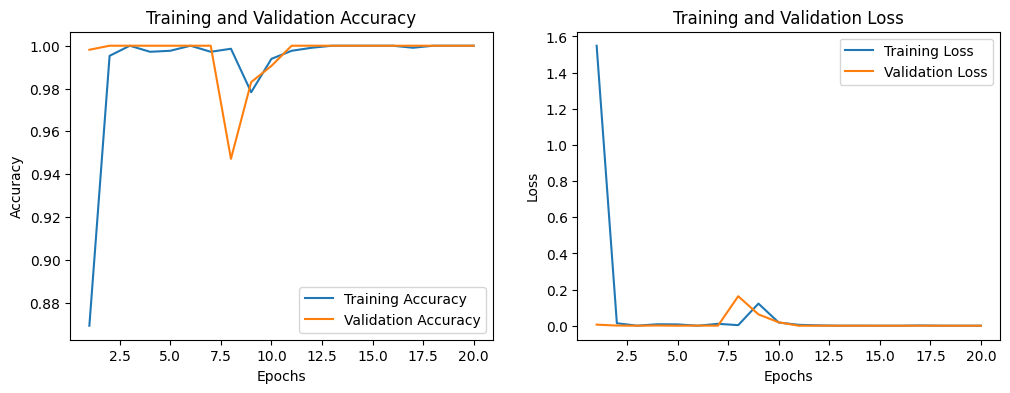

In [18]:
# Vẽ đồ thị đánh giá mô hình
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

**10. TEST THỬ MODEL SAU HUẤN LUYỆN**

In [19]:
# Load model vừa lưu
model_1 = load_model("/content/drive/MyDrive/Saved_Train/model_1_face_detection_20146132.h5")

In [20]:
# Đường dẫn folder chứa ảnh để Test
folder='/content/drive/MyDrive/Test/201462_Face_Detection/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(231,231))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['AnhKiet_20146499', 'Dat_20146488', 'Phong_20146132', 'Thach_20146530', 'Thai_20146117']
  print('Đây là : {}'.format(class_name[result]))
  plt.show()

Output hidden; open in https://colab.research.google.com to view.